In [74]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans

# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [76]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [77]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=1000,
    height=500,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [78]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
model = StandardScaler()
normalized_data = model.fit_transform(df_market_data)

In [79]:
df_normalized.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


In [80]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(normalized_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [81]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))

In [82]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

inertia_values = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertia_values.append(model.inertia_)

In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df1 = pd.DataFrame(elbow_data)
df1

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.738809
5,6,53.057788
6,7,44.406791
7,8,37.284807
8,9,32.161417
9,10,28.901182


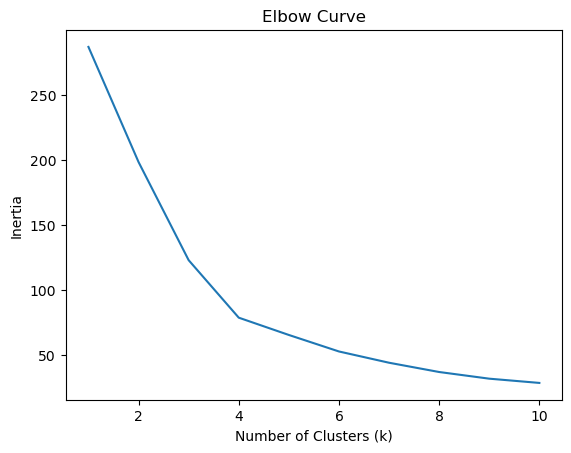

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df1['k'], df1['inertia'])
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters (k)')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: k=4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [85]:
# Initialize the K-Means model using the best value for k
model_k4 = KMeans(n_clusters=4)

In [86]:
# Fit the K-Means model using the scaled data
model_k4.fit(df_scaled)

KMeans(n_clusters=4)

In [87]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = model_k4.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_values)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [88]:
# Create a copy of the DataFrame
scaled_predicted_data_df = df_scaled.copy()

In [89]:
# Add a new column to the DataFrame with the predicted clusters
scaled_predicted_data_df['coin_cluster'] = cluster_values

# Display sample data
scaled_predicted_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [90]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_scatter_plot = scaled_predicted_data_df.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by='coin_cluster',
    title = "Marked Scaled Plot",
    hover_cols = "coin_id",
    width = 1000,
    height = 500
)

df_scatter_plot

:NdOverlay   [coin_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [91]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [92]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
coin_pca = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
coin_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [93]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: ** Total explained variance is 0.37+ 0.34 + 0.17 = 0.88 

In [94]:
# Create a new DataFrame with the PCA data.
coin_pca_df = pd.DataFrame(
    coin_pca,
    columns=["PC1", "PC2", "PC3"]
)

# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
coin_pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index
coin_pca_df = coin_pca_df.set_index('coin_id')

# Display sample data
coin_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [95]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))

In [96]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(coin_pca_df)
    inertia.append(model.inertia_)

In [97]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.738809


In [98]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve PCA",
    xticks=k,
    width=800,
    height=400
)

elbow_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** K=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** K=4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [99]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [100]:
# Fit the K-Means model using the PCA data
model.fit(coin_pca_df)

KMeans(n_clusters=4)

In [101]:
# Predict the clusters to group the cryptocurrencies using the PCA data
coin_clusters = model.predict(coin_pca_df)

# Print the resulting array of cluster values.
print(coin_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [102]:
# Create a copy of the DataFrame with the PCA data
df_coin_pca_predictions = coin_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_coin_pca_predictions['coin_cluster'] = coin_clusters

# Display sample data
df_coin_pca_predictions.head()

,PC1,PC2,PC3,coin_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [103]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

market_pca_plot = df_coin_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="coin_cluster",
    title = "Market PCA Plot",
    hover_cols = 'coin_id',
    width=800,
    height=400
)

market_pca_plot

:NdOverlay   [coin_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [104]:
# Composite plot to contrast the Elbow curves
(elbow_plot + pca_elbow_plot).cols(1)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [105]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
(df_scatter_plot + market_pca_plot).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [coin_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [coin_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  
In the Marked Scaled Plot, the clusters more towards the negative side and after we ran the PCA functionality, the clusters moved more towards the positive side.
Earlier, it was between 2 to -2 and in the Market PCA Plot, it was more towards 0 to 2 side. 
Using fewer features of the clusters and the K-means has both advantages and disadvantages.
It provides more simplification and scalability but the disadvantage is that there is a risk for loosing information is also associated with it. 